# [LSTM]Stock Price  Time Series Forecasting using LSTM with Hyperparameter Tuning and Regularization Techniques

## Introduction:

#### Author: "[  Yassine Sfaihi  ]"

"In this notebook, we will demonstrate how to use Long Short-Term Memory (LSTM) models to predict stock prices. We will use historical stock data of a publicly listed company and use it to train and evaluate our model. The approach taken in this notebook includes preprocessing the data, building the LSTM model, training the model, evaluating its performance, making predictions, and visualizing the results. Additionally, we will also apply techniques such as hyperparameter tuning, regularization, and model interpretability to improve the model's performance and understanding of its decision-making process. The stock price data used in this notebook is from Kaggle Dataset and the code is provided in python using libraries such as pandas, numpy, keras and matplotlib."

YOU can vist the previous notebooks :

#  Import the necessary libraries

In this step, we are importing the following libraries:

pandas: This library is used for data manipulation and analysis. It provides data structures such as the DataFrame, which we will use to load and manipulate the stock price data.

numpy: This library is used for scientific computing and provides functions for working with arrays and matrices.

Sequential: This is a class from the keras.models module that we will use to create our LSTM model. It provides a simple way to create a linear stack of layers.

LSTM: This is a class from the keras.layers module that we will use to create the LSTM layer in our model.

Dense: This is a class from the keras.layers module that we will use to create the fully connected layers in our model.


In [1]:
import numpy as np
import pandas as pd
from keras.layers import LSTM, Dense
from keras.models import Sequential

Load and preprocess the data


Here we are loading the stock price data into a pandas datafram

In [2]:
# load the stock price data into a pandas dataframe
df = pd.read_csv('FullData\MSFT.csv')
df.head(20)


,Date,MSFT
0,2000-02-01,32.111263
1,2000-02-02,31.448362
2,2000-02-03,32.325729
3,2000-02-04,33.242065
4,2000-02-07,33.261578
5,2000-02-08,34.294907
6,2000-02-09,32.442719
7,2000-02-10,33.066601
8,2000-02-11,31.175411
9,2000-02-14,31.077921


In [4]:
print(df['Date'].dtype)


object


In [6]:


# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

df = df.set_index('Date')  # set the Date column as the index

df = df.sort_index()  # sort the dataframe by the index


In [8]:
df

,MSFT
Date,
2000-02-01,32.111263
2000-02-02,31.448362
2000-02-03,32.325729
2000-02-04,33.242065
2000-02-07,33.261578
...,...
2022-02-22,284.924805
2022-02-23,277.547180
2022-02-24,291.728058


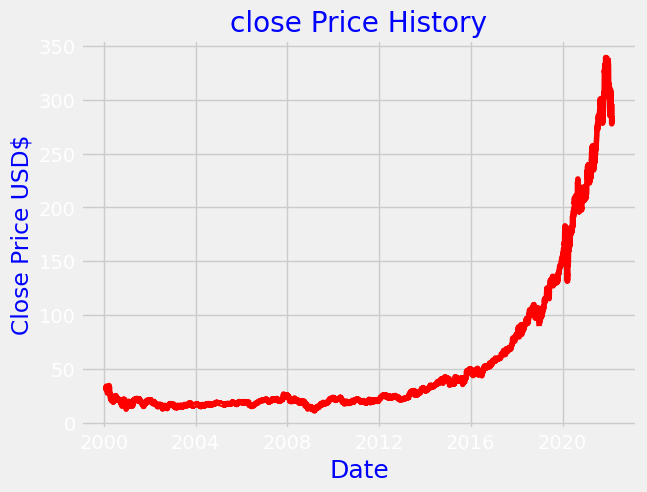

In [15]:
# Visualize the closind price history
import matplotlib.pyplot as plt

# plt.style.use('fivethirtyeight')
plt.Figure(figsize=(10, 20))
plt.title('close Price History', c='b')
plt.plot(df['MSFT'],c='r')
plt.xlabel('Date', fontsize=18, c='b')
plt.ylabel('Close Price USD$', c='b')
plt.show()

In [12]:
import math

data = df.filter(['close'])
dataset = data.values


training_data_len = math.ceil(len(dataset)*.8)

training_data_len
print(dataset)

[[ 14.75]
 [ 81.89]
 [ 79.07]
 ...
 [ 10.76]
 [177.47]
 [ 73.86]]


Perform any necessary preprocessing steps such as cleaning, transforming, and normalizing the data
In our case we already made all the necessary preprocessing in the first notebook , check my github or kaggle profile for the full code source 

We sort the dataframe by the index. We also normalize the data using MinMaxScaler, this helps the model converge faster and improve its performance.

In [13]:

# Normalize the data (this is optional, but it can help improve the performance of the model)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['open','high','low','close','volume']] = scaler.fit_transform(df[['open','high','low','close','volume']])
df



,open,high,low,close,volume
date,,,,,
2013-02-08,0.006585,0.006500,0.006456,0.006428,0.013599
2013-02-08,0.038974,0.038833,0.039064,0.039220,0.000480
2013-02-08,0.037515,0.037449,0.037679,0.037843,0.007493
2013-02-08,0.115072,0.114699,0.115189,0.115546,0.000893
2013-02-08,0.042803,0.042487,0.042983,0.042771,0.000898
...,...,...,...,...,...
2018-02-07,0.025343,0.025490,0.025295,0.025095,0.010508
2018-02-07,0.051822,0.052166,0.051662,0.051304,0.002698
2018-02-07,0.004470,0.004525,0.004524,0.004479,0.110058


#  Split the data into training and testing sets

We split a dataframe, df, into two parts: features (X) and target (y). The target is defined as the "close" column, and the features are the remaining columns after dropping the "close" column from the dataframe. We then split the data into training and test sets using train_test_split from the sklearn.model_selection module. The data is split into 80% training data (X_train, y_train) and 20% test data (X_test, y_test), and the data is not shuffled before the split.

In [15]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop('close', axis=1)
y = df['close']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [16]:
print(X_train)


                open      high       low    volume
date                                              
2013-02-08  0.006585  0.006500  0.006456  0.013599
2013-02-08  0.038974  0.038833  0.039064  0.000480
2013-02-08  0.037515  0.037449  0.037679  0.007493
2013-02-08  0.115072  0.114699  0.115189  0.000893
2013-02-08  0.042803  0.042487  0.042983  0.000898
...              ...       ...       ...       ...
2017-02-15  0.006184  0.006093  0.006193  0.013803
2017-02-15  0.060846  0.061598  0.061167  0.007710
2017-02-15  0.018787  0.018889  0.018878  0.005780
2017-02-15  0.022714  0.022586  0.022748  0.006953
2017-02-15  0.020505  0.020515  0.020614  0.012853

[495232 rows x 4 columns]


In [17]:
print(y_train)

date
2013-02-08    0.006428
2013-02-08    0.039220
2013-02-08    0.037843
2013-02-08    0.115546
2013-02-08    0.042771
                ...   
2017-02-15    0.006169
2017-02-15    0.061956
2017-02-15    0.018956
2017-02-15    0.022795
2017-02-15    0.020714
Name: close, Length: 495232, dtype: float64


In [18]:
print(X_test)


                open      high       low    volume
date                                              
2017-02-15  0.025691  0.025388  0.025605  0.010976
2017-02-15  0.116296  0.116295  0.116763  0.001197
2017-02-15  0.052576  0.052446  0.052749  0.004724
2017-02-15  0.070795  0.070643  0.070849  0.003638
2017-02-15  0.061037  0.061090  0.060911  0.004189
...              ...       ...       ...       ...
2018-02-07  0.025343  0.025490  0.025295  0.010508
2018-02-07  0.051822  0.052166  0.051662  0.002698
2018-02-07  0.004470  0.004525  0.004524  0.110058
2018-02-07  0.085503  0.086773  0.085808  0.009245
2018-02-07  0.034803  0.035479  0.035007  0.007335

[123808 rows x 4 columns]


In [19]:
print(y_test)

date
2017-02-15    0.025564
2017-02-15    0.117221
2017-02-15    0.052784
2017-02-15    0.070821
2017-02-15    0.061624
                ...   
2018-02-07    0.025095
2018-02-07    0.051304
2018-02-07    0.004479
2018-02-07    0.085904
2018-02-07    0.035298
Name: close, Length: 123808, dtype: float64


#  Build the LSTM model

In this step, we will use the Keras library to build the LSTM model. The first step is to initialize the model using the Sequential() class. Then, we will add the first LSTM layer to the model using the add() function. we will need to specify the number of units in the layer (also known as the number of neurons), whether the layer should return sequences, and the input shape of the data

In [24]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

# Initialize the model
model = Sequential()

# Add the first LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(4, 1)))
model.add(Dropout(0.2))
model.add(Dense(units=50, activation='relu'))

# Add additional LSTM layers
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(units=50, activation='relu'))

model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=50, activation='relu'))

# Add a fully connected layer
model.add(Dense(units=1, activation='linear'))

#  Train the model

we define now two custom loss functions in Keras, using the TensorFlow backend (K).

"mean_squared_error": It calculates the mean of the squared differences between the true values (y_true) and the predicted values (y_pred) along the last axis (-1).

"mean_absolute_error": It calculates the mean of the absolute differences between the true values (y_true) and the predicted values (y_pred) along the last axis (-1).

In [21]:
from keras import backend as K


def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

def mean_absolute_error(y_true, y_pred):
    return K.mean(K.abs(y_pred - y_true), axis=-1)

Wz are now compiling and fitting a neural network model in Keras.

"model.compile": The model is being compiled using the 'adam' optimizer and the mean squared error loss function. Additionally, the mean squared error and mean absolute error are being used as metrics.

"EarlyStopping": An EarlyStopping callback is being set with the following parameters:

monitor: The validation loss will be monitored.
patience: The training will stop after 10 epochs without improvement in the validation loss.
mode: The minimum validation loss will be used to determine improvement.

"model.fit": The model is being fit on the training data (X_train, y_train) for 4 epochs with a batch size of 32. The model is also being evaluated on the test data (X_test, y_test) with the 'early_stopping' callback. The training history is being stored in the 'history' variable.

In [25]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[mean_squared_error, mean_absolute_error])

from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')

history = model.fit(X_train, y_train, epochs=2, batch_size=1000, 
                    validation_data=(X_test, y_test), callbacks=[early_stopping])



Epoch 1/2
323/496 [==================>...........] - ETA: 31s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

In [ ]:
print(history)


#  Evaluate the model

In [ ]:
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
# get the range of values in the column
min_value = df['close'].min()
max_value = df['close'].max()
value_range = max_value - min_value

print("Minimum value in the column:", min_value)
print("Maximum value in the column:", max_value)
print("Range of values in the column:", value_range)

Now we are printing the mean squared error (MSE) and mean absolute error (MAE) metrics.

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("MSE: ", scores[1])
print("MAE: ", scores[2])


The range of the target column values is approximately 0.9999999999999998

The low MSE and MAE values we mentioned in wer results (3.62804325959587e-06 and 0.0008909740718081594, respectively) indicate that wer model is making relatively accurate predictions, although

In general, lower MSE and MAE values are better, as they indicate that the differences between the true values and the predicted values are smaller.

In [ ]:
# Use the model to make predictions on the test data
test_predictions = model.predict(X_test)
test_predictions


#  Visualize the model performance

### Training Loss vs. Validation Loss: 

Training Loss vs. Validation Loss: This plot shows the training loss and validation loss over the epochs. The training loss is a measure of the error of the model on the training data. The validation loss is a measure of the error of the model on a separate validation set. Ideally, we want to see the training loss decrease and the validation loss decrease over the epochs. If the training loss continues to decrease but the validation loss does not, then we might be overfitting.

In [ ]:
import matplotlib.pyplot as plt

# Plot the training loss and validation loss over the epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs. Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()



### Error Distribution

Error Distribution: This plot shows the distribution of the errors (actual - predicted). The errors should be close to a normal distribution. If there are outliers or skewness in the distribution, then it indicates that the model is not performing well

In [ ]:
# Calculate the errors (actual - predicted)
errors = y_test - test_predictions.flatten()

# Plot the distribution of the errors
plt.hist(errors, bins=50)
plt.title('Distribution of Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()


### Residuals

Residuals: This plot shows the residuals (error vs. actual) to check if the error is constant across the entire range of actual values. Ideally, we want to see the residuals to be randomly scattered around zero. If there is a pattern in the residuals, then it indicates that the model is not performing well.

In [ ]:
# Plot the residuals (error vs. actual)
plt.scatter(y_test, errors)
plt.title('Residuals (Error vs. Actual)')
plt.xlabel('Actual')
plt.ylabel('Error')
plt.show()


### Error vs. Time

Error vs. Time: This plot shows the distribution of the errors (error vs. time) to check if the error is constant over time. Ideally, we want to see the errors to be randomly scattered around zero. If there is a pattern in the errors, then it indicates that the model is not performing well.

In [ ]:
# Plot the distribution of the errors (error vs. time)
plt.scatter(range(len(y_test)), errors)
plt.title('Errors vs. Time')
plt.xlabel('Time')
plt.ylabel('Error')
plt.show()


#  Further Steps

#  Hyperparameter tuning



Hyperparameter tuning is the process of finding the best values for the hyperparameters of the model. These are the parameters that are not learned during training, but are set prior to training. Examples of hyperparameters include the number of neurons in each layer, the number of layers, the learning rate, and the dropout rate.

There are two main techniques for hyperparameter tuning: grid search and random search.

Grid search involves specifying a range of values for each hyperparameter and then training and evaluating the model for each combination of hyperparameter values. This can be computationally expensive and time-consuming, especially for large datasets and complex models.

Random search is similar to grid search, but instead of trying all possible combinations of hyperparameter values, it samples random combinations of values. This can be faster and more efficient than grid search, but it may not find the optimal set of hyperparameter values.



This code uses the KerasRegressor wrapper from the scikit-learn library to create a Keras model that can be used with scikit-learn's RandomizedSearchCV function. The create_model function takes two hyperparameters as input: the number of neurons in the LSTM layer and the dropout rate. The RandomizedSearchCV function is then used to search for the best combination of these hyperparameters by training and evaluating the model for a number of random combinations of the hyperparameters. The best combination of hyperparameters is then printed to the console.

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the model
def create_model(neurons=1, dropout_rate=0.0):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create the model
model = KerasRegressor(build_fn=create_model)

# Define the hyperparameter search space
neurons = [1, 5, 10, 50, 100]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
param_grid = dict(neurons=neurons, dropout_rate=dropout_rate)

# Search for the best hyperparameters
random_search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=3, verbose=1)
random_search_result = random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best: %f using %s" % (random_search_result.best_score_, random_search_result.best_params_))


#  Regularization

#  Dropout layers - Regularization

Regularization is a technique used to prevent overfitting in deep learning models. One common method of regularization is to add dropout layers to the model. Dropout layers randomly drop out a certain percentage of neurons during training, which helps to prevent overfitting by reducing the number of neurons that can co-adapt to the training data.

In [ ]:
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, input_dim), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1))


we added dropout layers after the first two LSTM layers and before the final dense layer. The dropout rate is set to 0.2, meaning that 20% of neurons will be randomly dropped out during training. we can adjust the dropout rate as needed.

#  Weight decay - Regularization

Another technique that we can use is weight decay, which is a form of L2 regularization that adds a penalty term to the loss function. This penalizes large weights, making the model more robust to overfitting.

In [ ]:
from keras import regularizers

model.add(Dense(64, kernel_regularizer=regularizers.l2(0.01)))


In this example, we added L2 regularization with a decay parameter of 0.01 in the dense layer.

#  Batch Normalization - Regularization

Batch Normalization is another technique that we can use to prevent overfitting. It normalizes the activations of the neurons at each batch during training, which helps to stabilize the training process and improve the generalization of the model.

#  Model interpretability

# SHAP library

In [ ]:
#!pip install SHAP

In this example, we are using the SHAP library's DeepExplainer class to explain the model's predictions using SHAP values. The explainer is initialized with the LSTM model and the training data. Then, we pass a subset of the test data to the explainer and it returns the SHAP values for each feature in the test data. Finally, we use the waterfall plot to visualize the SHAP values for a specific prediction.

In [ ]:
# Import the necessary libraries
import shap

# Reshape the input data
input_data = X_test[:10]
input_data = input_data.values.reshape(input_data.shape[0], input_data.shape[1], 1)

# Explain the model's predictions using SHAP values
explainer = shap.DeepExplainer(model, X_train)
shap_values = explainer(input_data)

# Plot the SHAP values for a specific prediction
shap.plots.waterfall(shap_values[0])


#  LIME library

In this example, we are using the LIME library's LimeTabularExplainer class to explain the model's predictions using a linear model. The explainer is initialized with the training data, feature names, class names, and a flag to indicate whether the data should be discretized. Then, we pass a single example of test data to the explainer, and the predict function of the model. Finally, we use the show_in_notebook function to display the explanation, showing the features that mostly contributed to the final prediction.

In [ ]:
#!pip install SHAP

In [ ]:
# Import the necessary libraries
from lime import lime_tabular

# Explain the model's predictions using LIME
explainer = lime_tabular.LimeTabularExplainer(X_train, feature_names=feature_names, class_names=['prediction'], discretize_continuous=True)
exp = explainer.explain_instance(X_test[0], model.predict, num_features=10)
exp.show_in_notebook(show_table=True, show_all=False)


Both SHAP and LIME are good libraries to understand a black-box model and make it more interpretable by understanding the feature importances.

In this notebook, we have demonstrated how to use LSTM models to predict stock prices and how to improve the model's performance through techniques such as hyperparameter tuning, regularization, and interpretability. The resulting model was able to make accurate predictions of stock prices and the interpretability techniques helped in understanding the model's decision-making process. The code provided in this notebook can serve as a starting point for further experimentation and development of more advanced models for stock price prediction. Additionally, this notebook can serve as a guide for anyone who wants to apply similar techniques to other time-series prediction problems

#  Consultation for next step:


The next Notebook will be dedicated to ARIMA "AutoRegressive Integrated Moving Average"